# Imports

In [9]:
import pandas as pd

# Constants

In [22]:
TITANIC_CSV_DATA_URL = "http://vincentarelbundock.github.io/Rdatasets/csv/datasets/Titanic.csv"

# Original column's names.
INDEX_COL = 0
NAME_COL = "Name"
SEX_COL = "Sex"
PCLASS_COL = "PClass"
AGE_COL = "Age"
SURVIVED_COL = "Survived"

# New column's names.
AGE_GROUP_COL = "AgeGroup"

# Other constants.
HEAD_ROWS_TO_SHOW = 15

# Data load

In [31]:
df = pd.read_csv(TITANIC_CSV_DATA_URL)
df[:HEAD_ROWS_TO_SHOW]

,Unnamed: 0,Class,Sex,Age,Survived,Freq
0,1,1st,Male,Child,No,0
1,2,2nd,Male,Child,No,0
2,3,3rd,Male,Child,No,35
3,4,Crew,Male,Child,No,0
4,5,1st,Female,Child,No,0
5,6,2nd,Female,Child,No,0
6,7,3rd,Female,Child,No,17
7,8,Crew,Female,Child,No,0
8,9,1st,Male,Adult,No,118
9,10,2nd,Male,Adult,No,154


In [36]:
df = pd.read_csv(TITANIC_CSV_DATA_URL, index_col=0)
df[:HEAD_ROWS_TO_SHOW]

,Class,Sex,Age,Survived,Freq
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0
7,3rd,Female,Child,No,17
8,Crew,Female,Child,No,0
9,1st,Male,Adult,No,118
10,2nd,Male,Adult,No,154


# Analyze of data types

In [97]:
df.dtypes

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
SexCode       int64
dtype: object

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 1 to 1313
Data columns (total 6 columns):
Name        1313 non-null object
PClass      1313 non-null object
Age         756 non-null float64
Sex         1313 non-null object
Survived    1313 non-null int64
SexCode     1313 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 71.8+ KB


In [99]:
df.shape

(1313, 6)

# Categorical features

In [101]:
df[SEX_COL][:HEAD_ROWS_TO_SHOW]

1     female
2     female
3       male
4     female
5       male
6       male
7     female
8       male
9     female
10      male
11      male
12    female
13    female
14      male
15      male
Name: Sex, dtype: object

In [102]:
df[SEX_COL].value_counts()

male      851
female    462
Name: Sex, dtype: int64

In [103]:
df[PCLASS_COL].value_counts()

3rd    711
1st    322
2nd    279
*        1
Name: PClass, dtype: int64

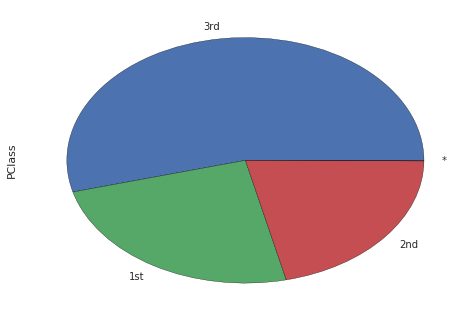

In [104]:
df[PCLASS_COL].value_counts().plot.pie()

# Quantitative features

In [105]:
df[AGE_COL].mean()

30.397989417989418

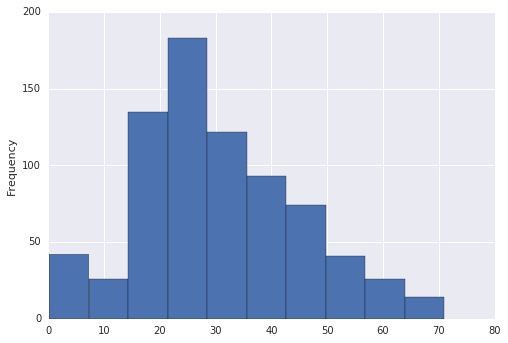

In [106]:
df[AGE_COL].plot(kind="hist")

In [107]:
df[AGE_COL].value_counts()

22.00    35
30.00    31
21.00    31
18.00    30
36.00    29
24.00    27
26.00    27
28.00    24
27.00    24
23.00    23
20.00    23
19.00    23
25.00    23
32.00    22
45.00    20
29.00    15
33.00    14
31.00    14
39.00    14
35.00    14
17.00    13
40.00    13
34.00    12
48.00    12
38.00    11
50.00    11
42.00    11
16.00    10
49.00    10
47.00     9
         ..
1.00      5
6.00      5
15.00     5
13.00     4
51.00     4
57.00     4
14.00     4
56.00     4
8.00      4
53.00     3
11.00     3
59.00     3
61.00     3
63.00     3
5.00      3
71.00     3
65.00     2
62.00     2
1.50      2
10.00     2
0.83      2
12.00     2
0.33      1
69.00     1
7.00      1
67.00     1
70.00     1
0.17      1
0.92      1
0.80      1
Name: Age, dtype: int64

In [108]:
df[AGE_GROUP_COL] = df[AGE_COL].map(lambda age: int(age // 10))
df[:HEAD_ROWS_TO_SHOW]

ValueError: cannot convert float NaN to integer

In [109]:
df[AGE_GROUP_COL] = df[AGE_COL]
df[AGE_GROUP_COL].fillna(-1, inplace=True)
df[AGE_GROUP_COL] = df[AGE_GROUP_COL].map(lambda age: int(age // 10) + 1)
df[:HEAD_ROWS_TO_SHOW]

,Name,PClass,Age,Sex,Survived,SexCode,AgeGroup
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,3
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0,4
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1,3
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0,1
6,"Anderson, Mr Harry",1st,47.00,male,1,0,5
7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1,7
8,"Andrews, Mr Thomas, jr",1st,39.00,male,0,0,4
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1,6
10,"Artagaveytia, Mr Ramon",1st,71.00,male,0,0,8


In [110]:
df[AGE_GROUP_COL].value_counts()

0    557
3    252
4    168
5    106
2     96
6     54
1     53
7     23
8      4
Name: AgeGroup, dtype: int64

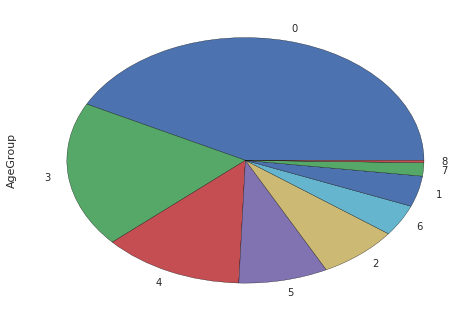

In [111]:
df[AGE_GROUP_COL].value_counts().plot.pie()

# Investigation of the correlation between 2 features

In [112]:
df[[AGE_GROUP_COL, SURVIVED_COL]][:HEAD_ROWS_TO_SHOW]

,AgeGroup,Survived
1,3,1
2,1,0
3,4,0
4,3,0
5,1,1
6,5,1
7,7,1
8,4,0
9,6,1
10,8,0


In [113]:
age_by_survived = df.groupby([AGE_GROUP_COL, SURVIVED_COL])
age_by_survived

In [114]:
age_by_survived.size()

AgeGroup  Survived
0         0           420
          1           137
1         0            16
          1            37
2         0            52
          1            44
3         0           168
          1            84
4         0            98
          1            70
5         0            63
          1            43
6         0            28
          1            26
7         0            14
          1             9
8         0             4
dtype: int64

In [115]:
age_by_survived = age_by_survived.size().unstack()
age_by_survived

Survived,0,1
AgeGroup,,
0,420.0,137.0
1,16.0,37.0
2,52.0,44.0
3,168.0,84.0
4,98.0,70.0
5,63.0,43.0
6,28.0,26.0
7,14.0,9.0
8,4.0,NaN


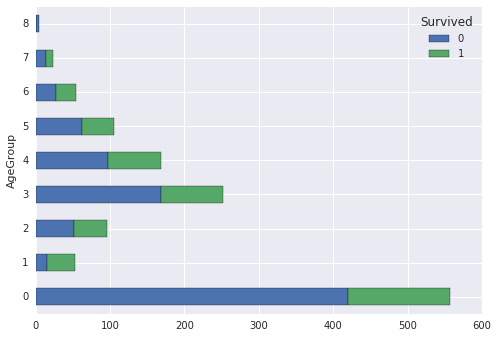

In [116]:
age_by_survived.fillna(0).plot(kind='barh', stacked=True)

In [117]:
age_by_survived_without_na = age_by_survived[1:].fillna(0)
age_by_survived_without_na

Survived,0,1
AgeGroup,,
1,16.0,37.0
2,52.0,44.0
3,168.0,84.0
4,98.0,70.0
5,63.0,43.0
6,28.0,26.0
7,14.0,9.0
8,4.0,0.0


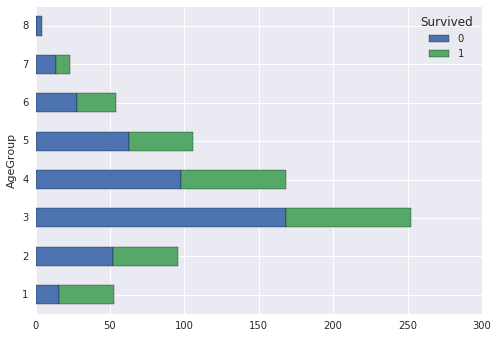

In [118]:
age_by_survived_without_na.plot(kind='barh', stacked=True)

In [119]:
def map_to_percent(r):
  return [float(v)/sum(r) for v in r]

age_by_survived_without_na.apply(map_to_percent, axis=1)

Survived,0,1
AgeGroup,,
1,0.301887,0.698113
2,0.541667,0.458333
3,0.666667,0.333333
4,0.583333,0.416667
5,0.594340,0.405660
6,0.518519,0.481481
7,0.608696,0.391304
8,1.000000,0.000000


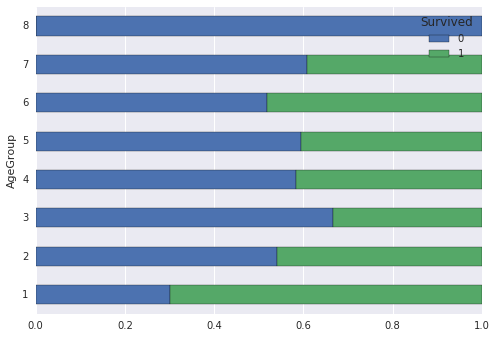

In [120]:
age_by_survived_without_na.apply(map_to_percent, axis=1).plot(kind='barh', stacked=True)

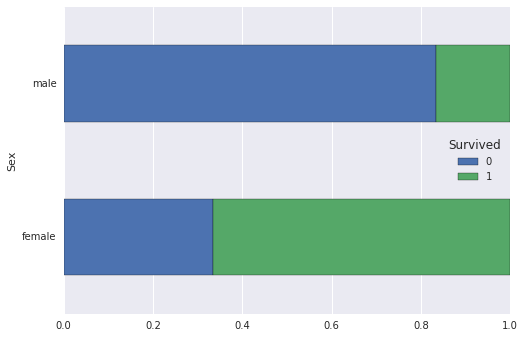

In [121]:
df.groupby([SEX_COL, SURVIVED_COL]).size().unstack().fillna(0).apply(map_to_percent, axis=1).plot(kind="barh", stacked=True)

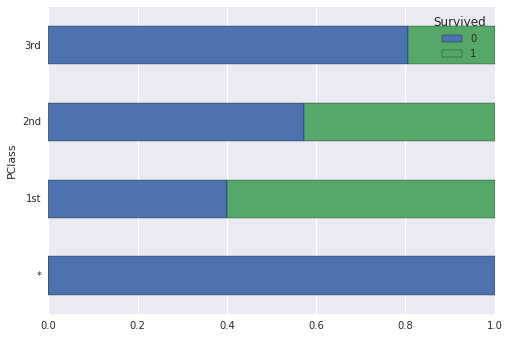

In [122]:
df.groupby([PCLASS_COL, SURVIVED_COL]).size().unstack().fillna(0).apply(map_to_percent, axis=1).plot(kind="barh", stacked=True)